In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import keras
from keras.models import Sequential, load_model
from plot_conf import *

Using Theano backend.
/cvmfs/icecube.opensciencegrid.org/py2-v2/RHEL_6_x86_64/lib/python2.7/site-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/cvmfs/icecube.opensciencegrid.org/py2-v2/RHEL_6_x86_64/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [12]:
input_data = np.array(np.load('./charge.npy'))[0:10000]/100
output_data = np.load('./truevals.npy')[0:10000]

In [13]:
tvt_ratio=[10,2,1] ##ratio of test validation and test dataset
data_len = len(input_data)
test_end = int(float(tvt_ratio[0])/np.sum(tvt_ratio)*data_len)
valid_end = int(float(tvt_ratio[1])/np.sum(tvt_ratio)*data_len)+test_end
print 'Range of training dataset {}:{}'.format(0,test_end)
print 'Range of validation dataset {}:{}'.format(test_end+1,valid_end)
print 'Range of test dataset {}:{}'.format(valid_end+1,data_len)

Range of training dataset 0:7692
Range of validation dataset 7693:9230
Range of test dataset 9231:10000


In [14]:
test  = input_data[valid_end+1:data_len-1]
test_out = np.log10(np.concatenate(output_data[valid_end+1:data_len-1, 0:1]))

In [15]:
estimator = load_model('./train_hist/model.h5')

In [16]:
res = estimator.predict(np.expand_dims(test, axis=4), verbose=1)

768/768 [==============================] - 24s    


In [2]:
plot_data = np.load('./train_hist/2017-07-05/last_model_noCNN_complete.npy')

/cvmfs/icecube.opensciencegrid.org/py2-v2/RHEL_6_x86_64/lib/python2.7/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


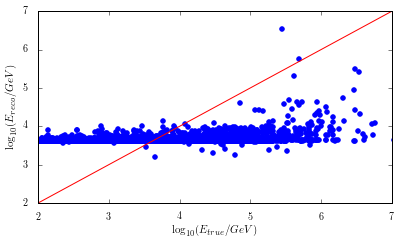

In [3]:
fig, ax= newfig(0.9)
ax.scatter(plot_data[1], plot_data[0], color='blue')
ax.plot(np.linspace(2,7,10), np.linspace(2,7,10),color='red')
ax.set_xlabel(r'$\log_{10}(E_{true}/GeV)$')
ax.set_ylabel(r'$\log_{10}(E_{reco}/GeV)$')
ax.set_xlim(2,7)
ax.set_ylim(2,7)
#plt.savefig('latest_network.pdf')
plt.show()

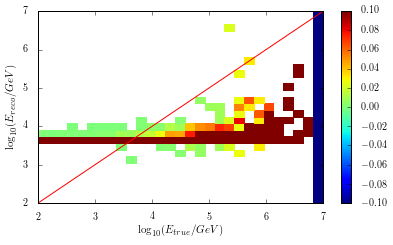

In [4]:

H, xedges, yedges = np.histogram2d(plot_data[1], plot_data[0], bins=(np.linspace(2,7,30), np.linspace(2,7,30)))
H=np.array([np.array(i)/np.sum(i) for i in H])
H = H.T  # Let each row list bins with common y range.
fig, ax = newfig(0.9)
X, Y = np.meshgrid(xedges, yedges)
ax.plot(np.linspace(2,7,10), np.linspace(2,7,10),color='red')
H= np.ma.array(H)
H.mask = H == 0
cbar = ax.pcolormesh(X, Y, H)
plt.colorbar(cbar)
ax.set_xlabel(r'$\log_{10}(E_{true}/GeV)$')
ax.set_ylabel(r'$\log_{10}(E_{reco}/GeV)$')
#plt.savefig('latest_network_density.pdf')
plt.show()



In [57]:
epoche = np.concatenate(np.genfromtxt('./train_hist/history2.csv', delimiter=',')[1:,0:1])
loss = np.concatenate(np.genfromtxt('./train_hist/history2.csv', delimiter=',')[1:,2:3])
val_loss = np.concatenate(np.genfromtxt('./train_hist/history2.csv', delimiter=',')[1:,4:5])

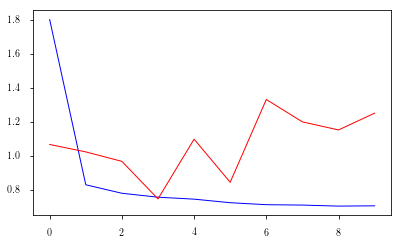

In [59]:
plt.plot(epoche, loss, color = 'blue')
plt.plot(epoche, val_loss, color = 'red')
plt.show()